In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from decodanda import Decodanda, generate_synthetic_data, visualize_synthetic_data

In [2]:
data = generate_synthetic_data(n_neurons=80, n_trials=30, keyA='stimulus', keyB='action', rateA=0.1, rateB=0, meanfr=0.05)

In [4]:
data.keys()

dict_keys(['raster', 'stimulus', 'action', 'trial'])

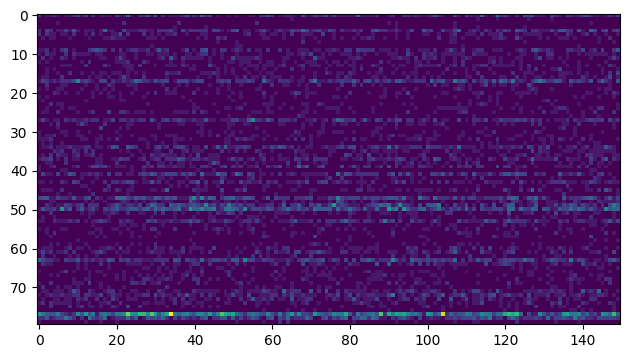

In [12]:
plt.imshow(np.transpose(data['raster']))

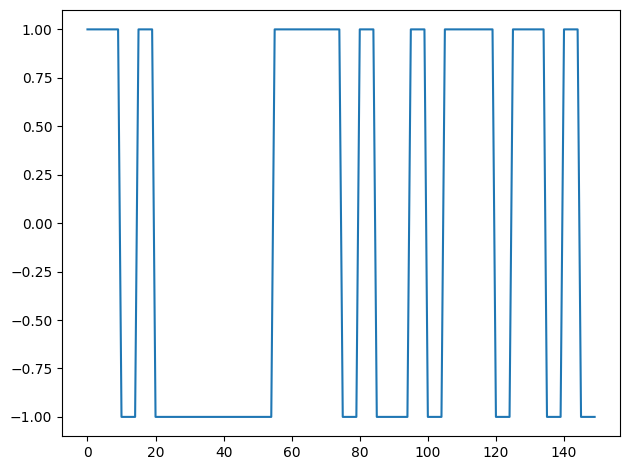

In [13]:
plt.plot(data['stimulus'])